In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

- 데이터 탐색

In [4]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df['target'] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


- Feature별 산점도와 선형회귀선

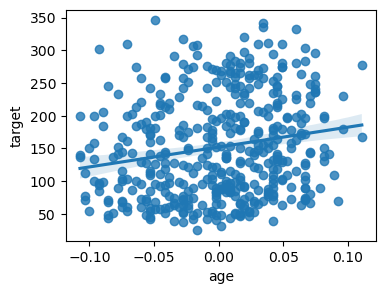

In [27]:
plt.figure(figsize=(4,3))
sns.regplot(x='age', y='target', data=df);

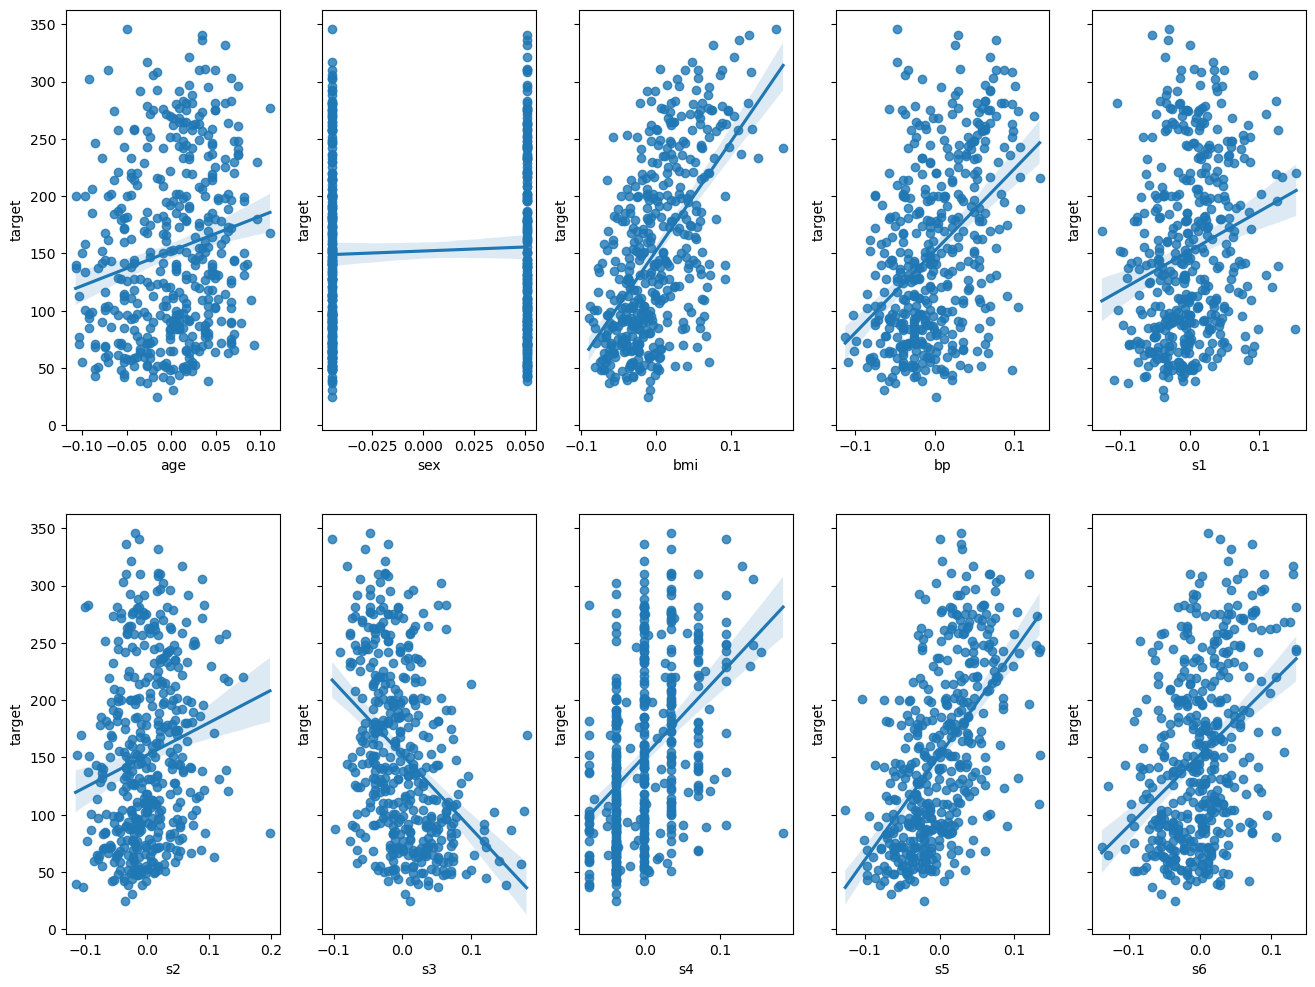

In [32]:
fis, axs = plt.subplots(2,5, figsize=(16,12), sharey=True)
for i, feature in enumerate(df.columns[:-1]):
    row,col=i // 5, i % 5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

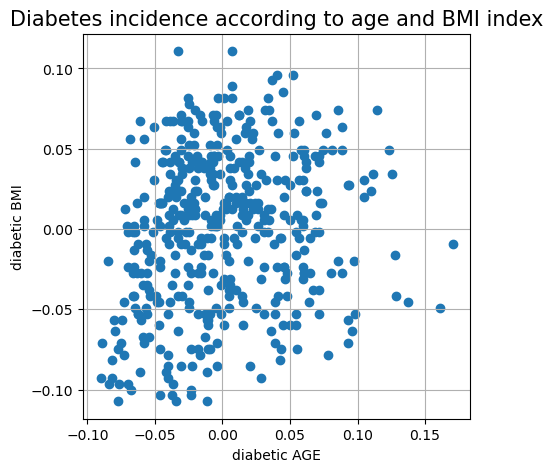

In [38]:
plt.figure(figsize=(5,5))
plt.scatter(df.bmi, df.age)
plt.xlabel("diabetic AGE")
plt.ylabel("diabetic BMI")
plt.title('Diabetes incidence according to age and BMI index', fontsize=15)
plt.grid()
plt.show()

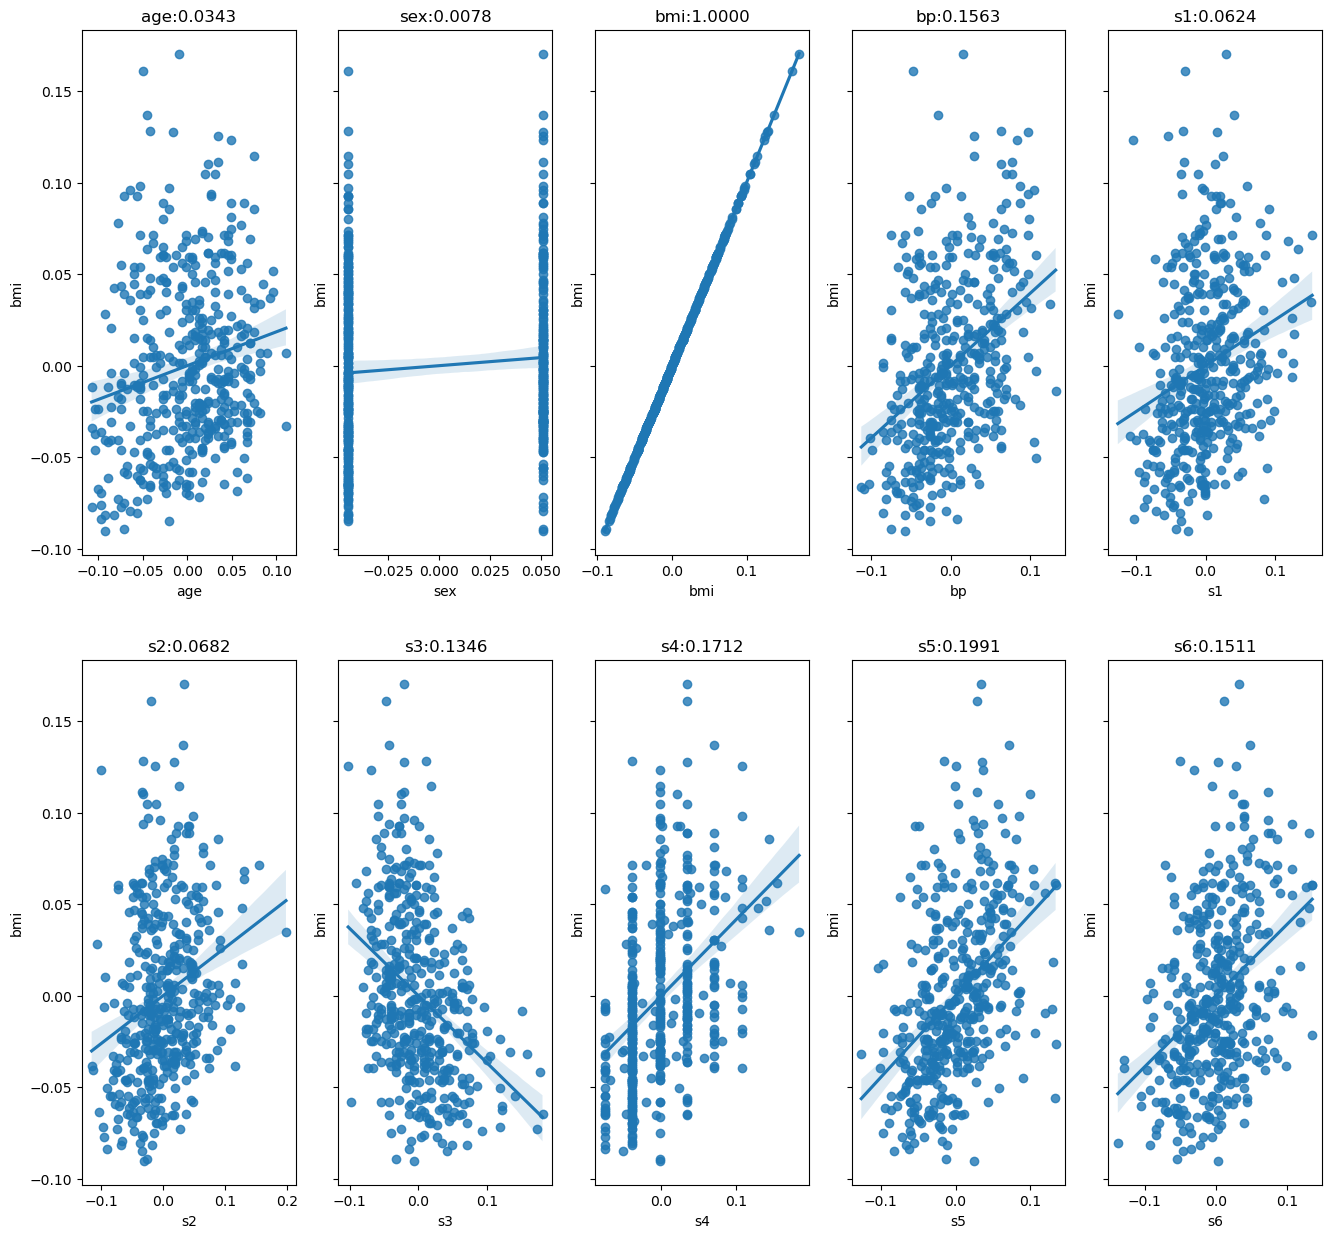

In [43]:
from sklearn.linear_model import LinearRegression
fig, axs = plt.subplots(2, 5, figsize=(16,15),sharey=True)
for i, feature in enumerate(df.columns[:-1]):
    row,col = i // 5, i % 5
    ax=axs[row][col]
    sns.regplot(x=feature, y='bmi', data=df, ax=ax)
    lr = LinearRegression()
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, df.bmi.values)
    score = lr.score(X, df.bmi.values)
    ax.set_title(f'{feature}:{score:.4f}')


- 다중 선형 회귀

In [72]:
 df.bmi.values.reshape(-1, 1)

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

 df.bmi.values.reshape(-1, 1) <<-1이 들어가는 이유>>
https://rfriend.tistory.com/345

> 앞에 -1일 들어가는 경우 행이 한줄 , 뒤에 -1이 들어가는 경우 열이 1줄 ( 리스트의 형태 변경 )

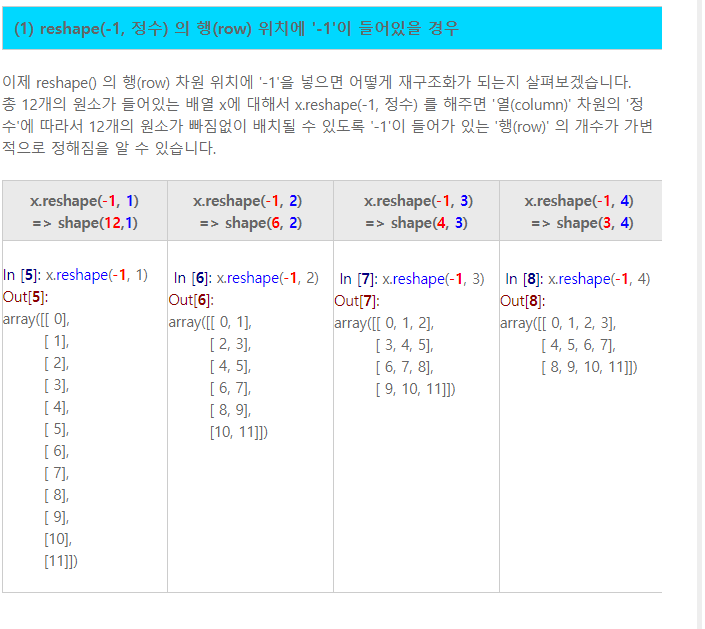
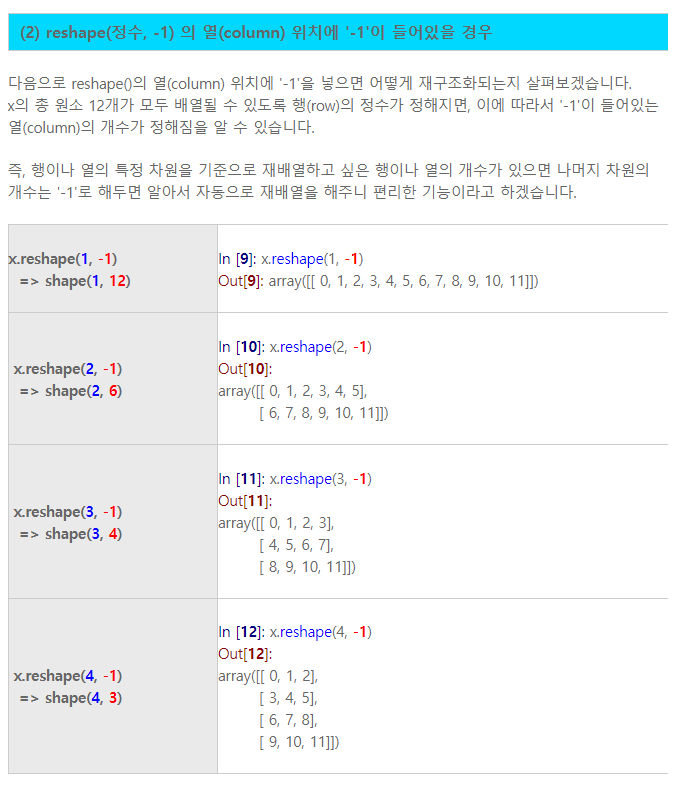
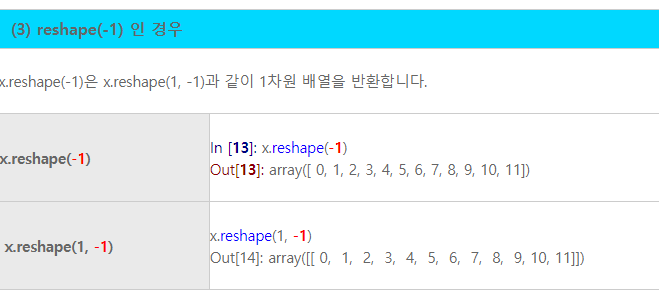

In [51]:
#  훈련/테스트 데이터넷 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(
   df.bmi.values.reshape(-1, 1), diab.target, test_size=0.2, random_state=2023
) 

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
# 결정 계수(R Squared)
lr.score(X_test, y_test)

0.3017494407564788

In [54]:
# 가중치, 바이어스
lr.coef_, lr.intercept_

(array([934.31985305]), 152.34582045693807)

In [55]:
# Weight, bias를 이용하여 직접 계산
np.dot(lr.coef_, X_test[0]) +  lr.intercept_

169.70896232582598

In [56]:
# predict( method 사용)
y_hat = lr.predict(X_test[0].reshape(1,-1))
y_hat[0]

169.70896232582598

In [57]:
# 10개 테스트 데이터에 적용
y_hat = lr.predict(X_test)
for i in range(10):
    print(f'실제값: {y_test[i]},\t예측값: {y_hat[i]:.2f}')

실제값: 265.0,	예측값: 169.71
실제값: 261.0,	예측값: 232.14
실제값: 160.0,	예측값: 124.39
실제값: 249.0,	예측값: 157.62
실제값: 102.0,	예측값: 110.29
실제값: 200.0,	예측값: 239.19
실제값: 42.0,	예측값: 101.23
실제값: 55.0,	예측값: 89.15
실제값: 178.0,	예측값: 113.32
실제값: 317.0,	예측값: 196.90


- Random Forest

In [60]:

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_sv)
mse_sv = mean_squared_error(y_test, y_hat_sv)
r2_sv

0.21771444515616456

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.18878931648292208

- XGboost


In [64]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_hat_xgb = xgbr.predict(X_test)
r2_xgb = r2_score(y_test, y_hat_xgb)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_xgb

0.16112417529264378

- Linear Regression

In [66]:
r2_lr = r2_score(y_test, y_hat)
mse_lr = mean_squared_error(y_test, y_hat)

- 비교

In [67]:
print('\t\tLR\tSVM\tRF\tXGBoost')
print(f'R Squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xgb:.4f}')
print(f'MSE\t\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xgb:.2f}')

		LR	SVM	RF	XGBoost
R Squared	0.3017	0.2177	0.1888	0.1611
MSE		4885.23	5473.17	5675.54	5869.10


In [68]:
rf = pd.DataFrame({
    'y':y_test, 'LR':y_hat, 'SV':y_hat_sv, 'RF':y_hat_rf,'XGBoost':y_hat_xgb
})
rf.head(10)

,y,LR,SV,RF,XGBoost
0,265.0,169.708962,156.749747,175.914528,192.845566
1,261.0,232.144278,173.753474,296.205944,301.475983
2,160.0,124.393007,119.485381,104.382341,104.967331
3,249.0,157.624708,146.784213,168.856028,168.496536
4,102.0,110.294710,114.126114,88.030960,90.249809
5,200.0,239.193426,172.932418,173.025000,133.411819
6,42.0,101.231519,113.664480,100.627667,101.205879
7,55.0,89.147265,116.395837,72.232190,72.271255
8,178.0,113.315774,114.804048,123.449615,119.802994
9,317.0,196.898535,170.656970,220.023333,248.039322
